### MSDS  6120 - Capstone - Newman_Shah_Vaughn ###


### Librosa Feature Extraction ###


In [6]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import IPython.display as ipd
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.style as ms
import seaborn as sns
from pathlib import Path
import sklearn, urllib
#import stanford_mir; stanford_mir.init()
import os
import audioread
import random
import itertools

In [7]:
def manipulate (data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave')
    plt.ylable('Amplitude')
    plt.plot(np.linespace(0,1,len(data)), data)
    plt.show()
    

In [8]:
## Donload file and decode it for visualization
audio_file = "/Users/Dhyan/Capstone_A/KHNH_SoNi.mp3"

In [9]:
KHNH, sample_rate = librosa.load(audio_file)
#plot_time_series(data)
KHNH, sr = librosa.load('/Users/Dhyan/Capstone_A/KHNH_SoNi.mp3')

/Users/Dhyan/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/Dhyan/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [10]:
print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(KHNH)))
secs=np.size(KHNH)/sr
print('Audio Length: '+str(secs)+' s')
IPython.display.Audio(audio_file)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 7045344
Audio Length: 319.51673469387754 s


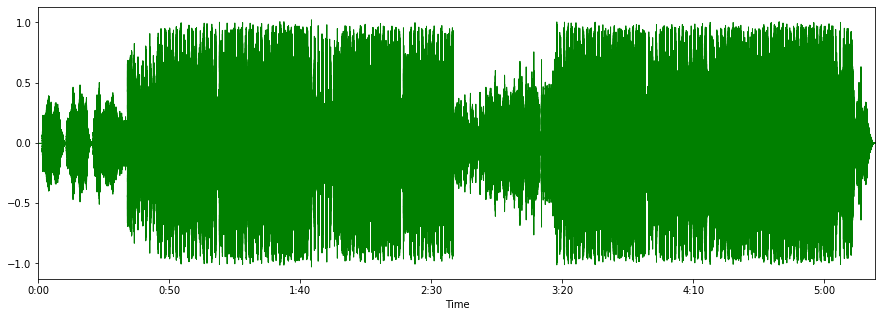

In [54]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(KHNH, sr=sr,color='g')

In [88]:
sr = 22050
n_fft = 2048
hop_length = 512
D = librosa.stft(KHNH)


Text(0.5, 1.0, 'KHNH Harmonic + Percussive')

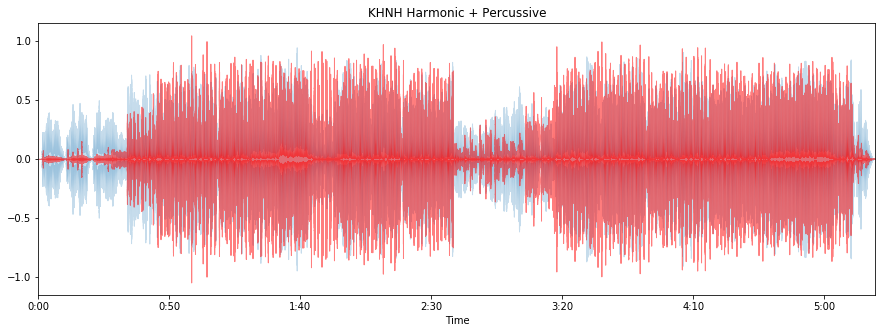

In [11]:
KHNH_harmonic, KHNH_percussive = librosa.effects.hpss(KHNH)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(KHNH_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(KHNH_percussive, sr=sr, color='r', alpha=0.5)
plt.title('KHNH Harmonic + Percussive')

In [112]:
#IPython.display.Audio(data=KHNH_harmonic, rate=sr)

### Player Disabled

In [111]:
#IPython.display.Audio(data=KHNH_percussive, rate=sr)
### Player Disabled

### Feature Extractions ###

In [21]:
print (KHNH.shape)
print (sr)

(7045344,)
22050


****Zero Crossing****

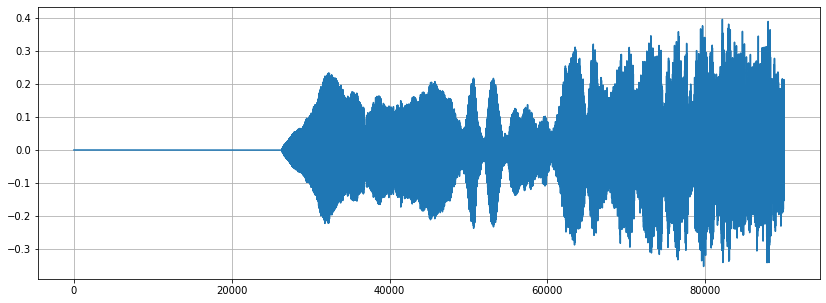

In [102]:
# Zooming in
n0 = 0
n1 = 90000
plt.figure(figsize=(14, 5))
plt.plot(KHNH[n0:n1])
plt.grid()

In [107]:
zero_crossings = librosa.zero_crossings(KHNH[n0:n1], pad=False)
print('Zero Crossing:',sum(zero_crossings))


Zero Crossing: 7017


****1. Beat - Tempo****

In [13]:
tempo, beat_frames = librosa.beat.beat_track(y=KHNH_harmonic, sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')


Detected Tempo: 83.35433467741936 beats/min


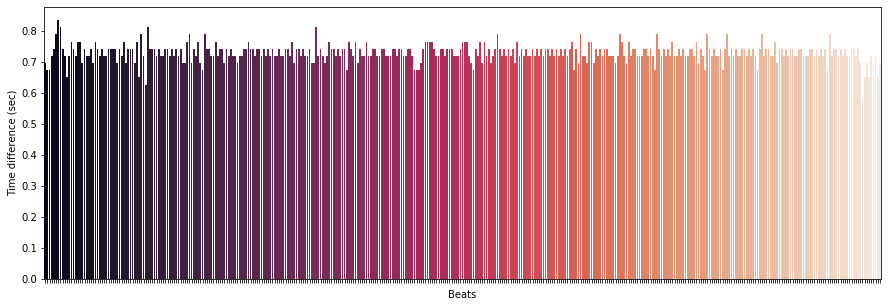

In [19]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (sec)")
ax.set_xlabel("Beats")
g=sns.barplot(beat_nums, beat_time_diff, palette="rocket",ax=ax)
g=g.set(xticklabels=[])

In [113]:
#import mir_eval 
#y_click = mir_eval.sonify.clicks(beat_times, sr, length=len(KHNH))
#IPython.display.Audio(data=KHNH + y_click, rate=sr)

### Player Disabled

In [37]:
beat_df=pd.DataFrame()
beat_df['tempo']=tempo
beat_df.loc[0]=tempo
beat_df

tempo
0  83.354335

**2. Chroma Energy Normalized Statistics (CENS)**

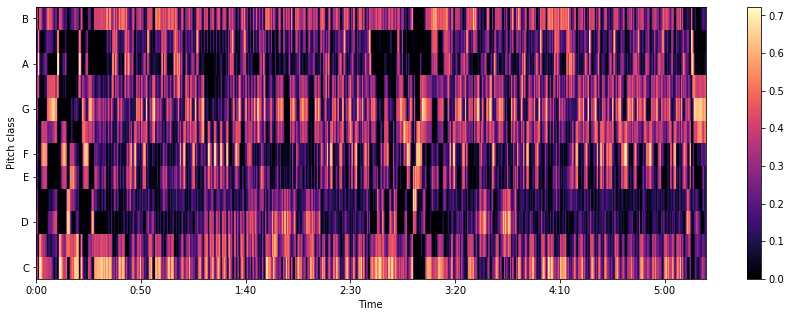

In [23]:
chroma=librosa.feature.chroma_cens(x=KHNH_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

  *2a. Log CENS*

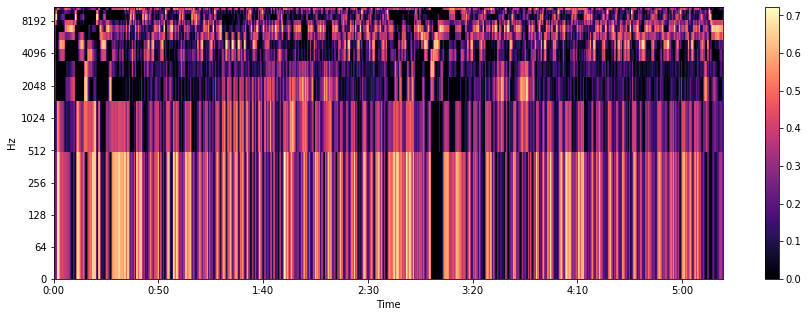

In [86]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

chroma_mean_0  chroma_mean_1  chroma_mean_2  chroma_mean_3  chroma_mean_4  \
0       0.349489       0.262109       0.167169        0.14226       0.194398   

   chroma_mean_5  chroma_mean_6  chroma_mean_7  chroma_mean_8  chroma_mean_9  \
0       0.213155       0.274961        0.29824        0.24584       0.166853   

   ...  chroma_std_2  chroma_std_3  chroma_std_4  chroma_std_5  chroma_std_6  \
0  ...      0.156146       0.11592      0.155559      0.192991      0.149871   

   chroma_std_7  chroma_std_8  chroma_std_9  chroma_std_10  chroma_std_11  
0      0.191621      0.141128      0.161907       0.149622       0.157211  

[1 rows x 24 columns]

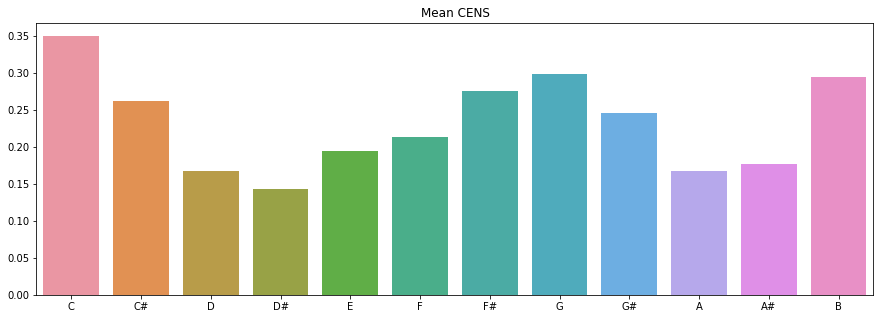

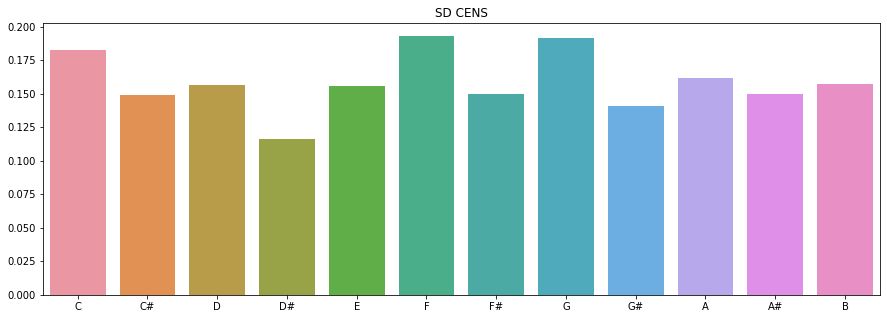

In [38]:
chroma_mean=np.mean(chroma,axis=1)
chroma_std=np.std(chroma,axis=1)
#plot the summary
octave=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
plt.figure(figsize=(15,5))
plt.title('Mean CENS')
sns.barplot(x=octave,y=chroma_mean)

plt.figure(figsize=(15,5))
plt.title('SD CENS')
sns.barplot(x=octave,y=chroma_std)
#Generate the chroma Dataframe
chroma_df=pd.DataFrame()
for i in range(0,12):
    chroma_df['chroma_mean_'+str(i)]=chroma_mean[i]
for i in range(0,12):
    chroma_df['chroma_std_'+str(i)]=chroma_mean[i]
chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

chroma_df

****3. Mel-frequency cepstral coefficients (MFCCs)****

Text(0.5, 1.0, 'MFCC')

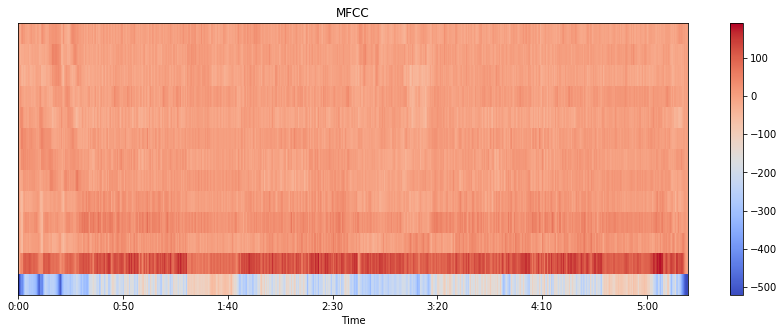

In [42]:
mfccs = librosa.feature.mfcc(y=KHNH_harmonic, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

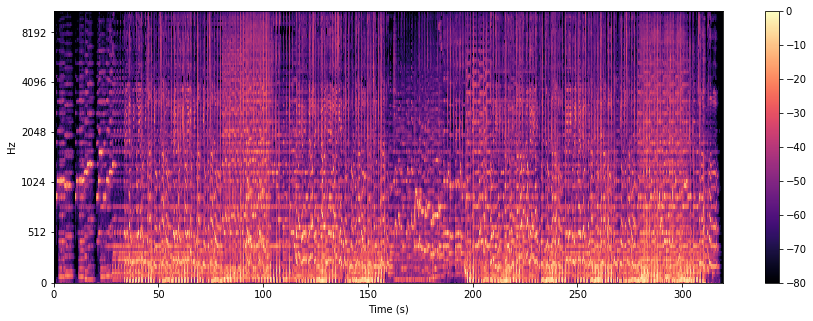

In [108]:
spec = librosa.feature.melspectrogram(y=KHNH, sr=sr)
import librosa.display
#librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
#plt.colorbar()
plt.figure(figsize=(15, 5))
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();

mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  mfccs_mean_3  mfccs_mean_4  \
0   -194.312546    109.518364     13.008896     28.408934      7.585107   

   mfccs_mean_5  mfccs_mean_6  mfccs_mean_7  mfccs_mean_8  mfccs_mean_9  ...  \
0      4.545882      3.506294      5.264979     -5.916394       3.98668  ...   

   mfccs_std_3  mfccs_std_4  mfccs_std_5  mfccs_std_6  mfccs_std_7  \
0    16.937016    15.574578    12.915142    12.968615    11.507492   

   mfccs_std_8  mfccs_std_9  mfccs_std_10  mfccs_std_11  mfccs_std_12  
0    13.290582    12.603621     13.415033     11.756903      11.51685  

[1 rows x 26 columns]

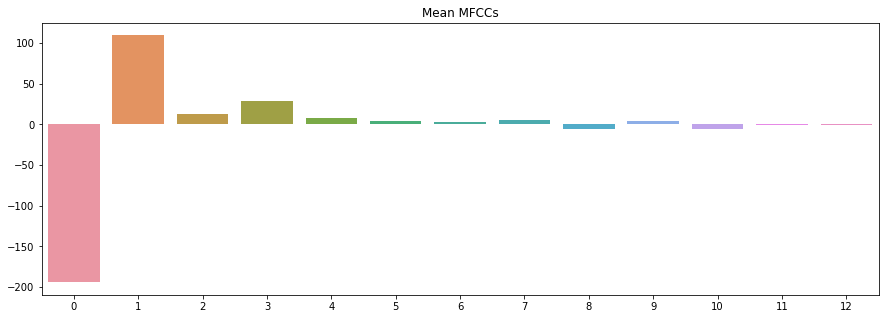

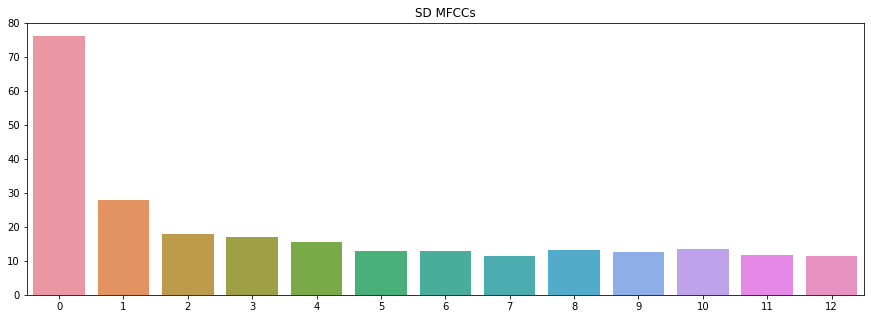

In [43]:
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,13)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std)


#Populate the Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,13):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,13):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

****4. Spectoral Centroid****

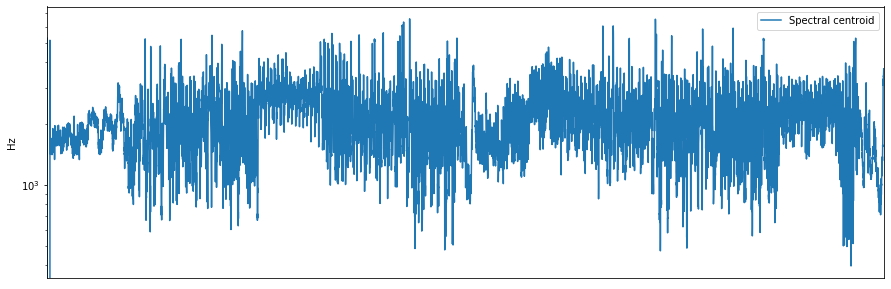

In [32]:
cent = librosa.feature.spectral_centroid(y=KHNH, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

In [44]:
cent_mean=np.mean(cent)
cent_std=np.std(cent)
cent_skew=scipy.stats.skew(cent,axis=1)[0]
print('Mean: '+str(cent_mean))
print('SD: '+str(cent_std))
print('Skewness: '+str(cent_skew))

Mean: 1985.04340822511
SD: 774.8473973135083
Skewness: 1.1715118224597165


****5. Spectoral Rolloff****

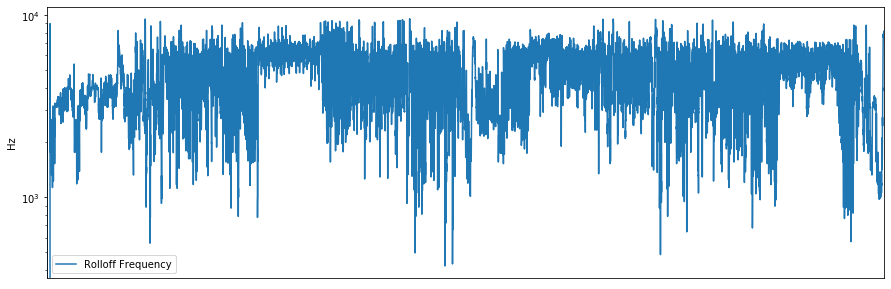

In [35]:
rolloff = librosa.feature.spectral_rolloff(y=KHNH, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Rolloff Frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

In [45]:
rolloff_mean=np.mean(rolloff)
rolloff_std=np.std(rolloff)
rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]
print('Mean: '+str(rolloff_mean))
print('SD: '+str(rolloff_std))
print('Skewness: '+str(rolloff_skew))

Mean: 4320.142495733527
SD: 1799.3656271916145
Skewness: 0.27569166728318345


In [48]:
spectral_df=pd.DataFrame()
collist=['cent_mean','cent_std','cent_skew']
for i in range(0,7):
    collist.append('contrast_mean_'+str(i))
for i in range(0,7):
    collist.append('contrast_std_'+str(i))
collist=collist+['rolloff_mean','rolloff_std','rolloff_skew']
for c in collist:
    spectral_df[c]=0
data=np.concatenate(([cent_mean,cent_std,cent_skew],contrast_mean,contrast_std,[rolloff_mean,rolloff_std,rolloff_std]),axis=0)
spectral_df.loc[0]=data
spectral_df

cent_mean    cent_std  cent_skew  contrast_mean_0  contrast_mean_1  \
0  1985.043408  774.847397   1.171512        24.405838        21.493917   

   contrast_mean_2  contrast_mean_3  contrast_mean_4  contrast_mean_5  \
0        26.671986        27.066017        25.264495        24.777595   

   contrast_mean_6  contrast_std_0  contrast_std_1  contrast_std_2  \
0        36.281205        5.855907        4.647733        4.900602   

   contrast_std_3  contrast_std_4  contrast_std_5  contrast_std_6  \
0        5.586643        5.078199        5.466884        4.160507   

   rolloff_mean  rolloff_std  rolloff_skew  
0   4320.142496  1799.365627   1799.365627

****6. Spectoral Contrast****

Text(0.5, 1.0, 'Spectral Contrast')

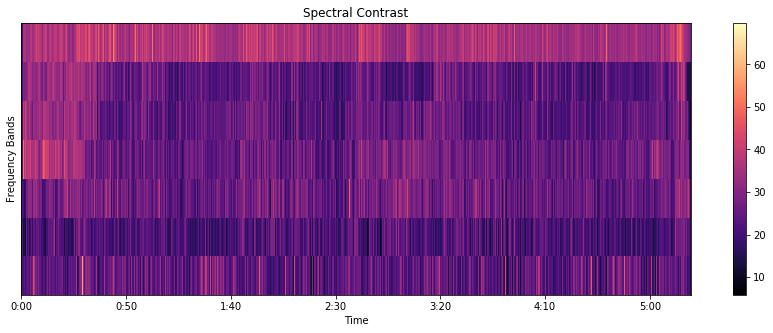

In [34]:
contrast=librosa.feature.spectral_contrast(y=KHNH_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency Bands')
plt.title('Spectral Contrast')

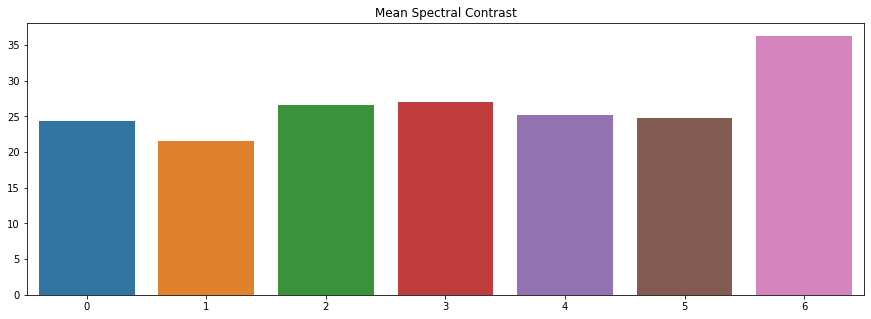

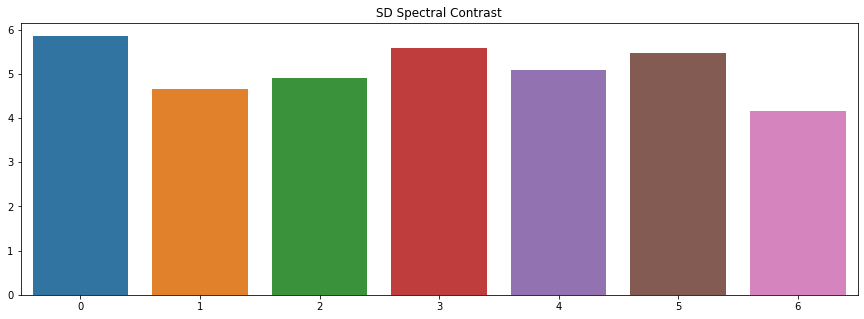

In [47]:
contrast_mean=np.mean(contrast,axis=1)
contrast_std=np.std(contrast,axis=1)

conts=np.arange(0,7)
plt.figure(figsize=(15,5))
plt.title('Mean Spectral Contrast')
sns.barplot(x=conts,y=contrast_mean)

plt.figure(figsize=(15,5))
plt.title('SD Spectral Contrast')
sns.barplot(x=conts,y=contrast_std)
#Generate the chroma Dataframe
contrast_df=pd.DataFrame()

****7. Zero Crossing Rate****

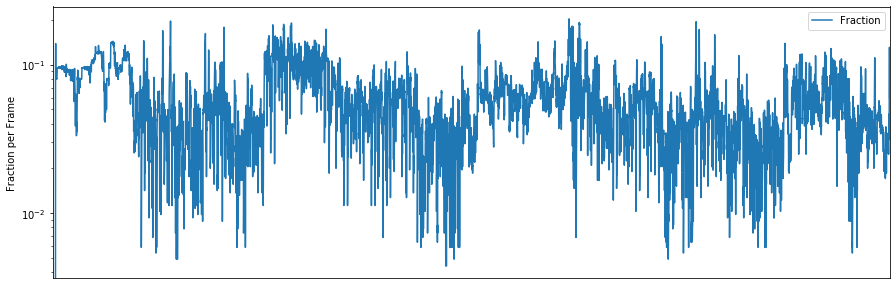

In [36]:
zrate=librosa.feature.zero_crossing_rate(KHNH_harmonic)
plt.figure(figsize=(15,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

In [49]:
zrate_mean=np.mean(zrate)
zrate_std=np.std(zrate)
zrate_skew=scipy.stats.skew(zrate,axis=1)[0]
print('Mean: '+str(zrate_mean))
print('SD: '+str(zrate_std))
print('Skewness: '+str(zrate_skew))

Mean: 0.05715722166584914
SD: 0.03192910135527836
Skewness: 0.8675027752302985


In [50]:
zrate_df=pd.DataFrame()
zrate_df['zrate_mean']=0
zrate_df['zrate_std']=0
zrate_df['zrate_skew']=0
zrate_df.loc[0]=[zrate_mean,zrate_std,zrate_skew]
zrate_df

zrate_mean  zrate_std  zrate_skew
0    0.057157   0.031929    0.867503

****Feacures Data Frame****

In [51]:
final_df=pd.concat((beat_df,chroma_df,mfccs_df,spectral_df,zrate_df),axis=1)
final_df.head()

tempo  chroma_mean_0  chroma_mean_1  chroma_mean_2  chroma_mean_3  \
0  83.354335       0.349489       0.262109       0.167169        0.14226   

   chroma_mean_4  chroma_mean_5  chroma_mean_6  chroma_mean_7  chroma_mean_8  \
0       0.194398       0.213155       0.274961        0.29824        0.24584   

   ...  contrast_std_3  contrast_std_4  contrast_std_5  contrast_std_6  \
0  ...        5.586643        5.078199        5.466884        4.160507   

   rolloff_mean  rolloff_std  rolloff_skew  zrate_mean  zrate_std  zrate_skew  
0   4320.142496  1799.365627   1799.365627    0.057157   0.031929    0.867503  

[1 rows x 74 columns]

****Beat Synchronous Freatures Aggregation****

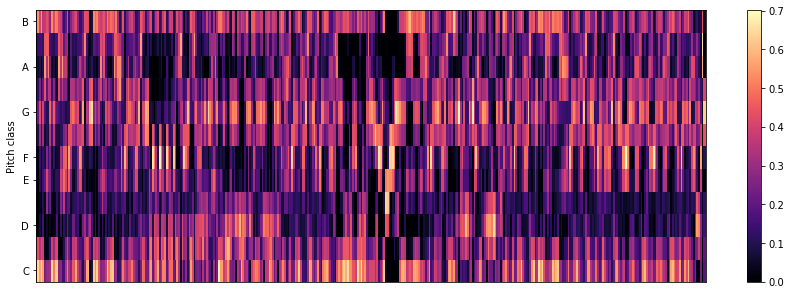

In [74]:
c_sync = librosa.util.sync(chroma, beat_frames, aggregate=np.median)
plt.figure(figsize=(15,5))
librosa.display.specshow(c_sync, y_axis='chroma')
plt.colorbar()

****Repeated Progression****

In [80]:
R = librosa.segment.recurrance_matrix(chroma_stack, sym=True)
librosa.display.specshow(R, aspect='equal')

AttributeError: module 'librosa.segment' has no attribute 'recurrance_matrix'